<a href="https://colab.research.google.com/github/allefbcc/cienciaDeDados/blob/main/%5BPET%5D%202%C2%B0%20Fase/%5BPET%5D_%C3%81llef_Robson_Atividade_01_2%C2%B0_Fase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
path = 'https://raw.githubusercontent.com/allefbcc/cienciaDeDados/main/Gold%20Price.csv'
dados = pd.read_csv(path)

In [ ]:
dados.head(5)

,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-01-02,29975,29678,30050,29678,3140,1.47
2,2014-01-03,29727,30031,30125,29539,3050,-0.83
3,2014-01-04,29279,29279,29279,29279,0,-1.51
4,2014-01-06,29119,29300,29395,29051,24380,-0.55


In [ ]:
dados.tail(5)

,Date,Price,Open,High,Low,Volume,Chg%
2222,2022-08-01,51260,51899,51899,51023,1350,-0.20
2223,2022-08-02,51274,51438,51527,51100,230,0.03
2224,2022-08-03,51225,51250,51375,51137,70,-0.10
2225,2022-08-04,51802,51713,51903,51713,10,1.13
2226,2022-08-05,51820,51935,51965,51525,11080,0.03


In [ ]:
dados.isna().sum()

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2227 non-null   object 
 1   Price   2227 non-null   int64  
 2   Open    2227 non-null   int64  
 3   High    2227 non-null   int64  
 4   Low     2227 non-null   int64  
 5   Volume  2227 non-null   int64  
 6   Chg%    2227 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 121.9+ KB


In [ ]:
dados['Date'] = pd.to_datetime(dados['Date'])

In [ ]:
dados = dados.set_index('Date')

In [ ]:
dados

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2014-01-01,29542,29435,29598,29340,2930,0.25
2014-01-02,29975,29678,30050,29678,3140,1.47
2014-01-03,29727,30031,30125,29539,3050,-0.83
2014-01-04,29279,29279,29279,29279,0,-1.51
2014-01-06,29119,29300,29395,29051,24380,-0.55
...,...,...,...,...,...,...
2022-08-01,51260,51899,51899,51023,1350,-0.20
2022-08-02,51274,51438,51527,51100,230,0.03
2022-08-03,51225,51250,51375,51137,70,-0.10


In [ ]:
#sns.set(rc={'figure.figsize': (12,6)})

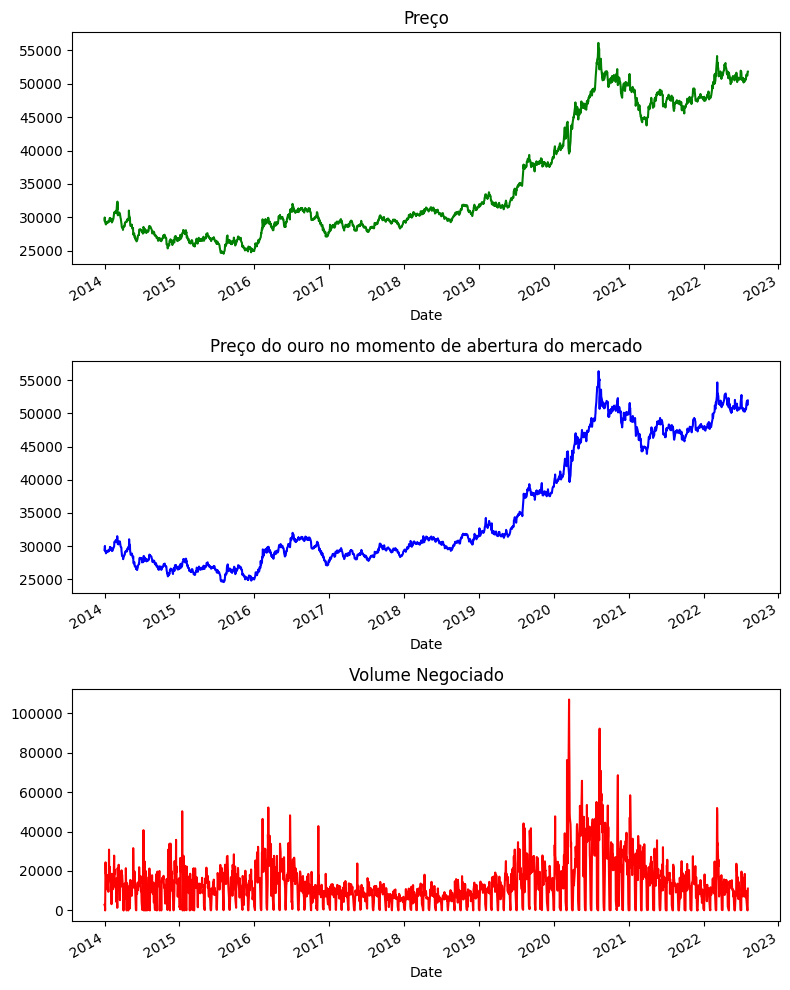

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))


dados['Price'].plot(ax=ax1, color='green')
ax1.set_title('Preço')

dados['Open'].plot(ax=ax2, color='blue')
ax2.set_title('Preço do ouro no momento de abertura do mercado')

dados['Volume'].plot(ax=ax3, color='red')
ax3.set_title('Volume Negociado')


plt.tight_layout()

plt.show()

### Analisando os componentes da série temporal

In [ ]:
serie_price = dados['Price']
serie_open = dados['Open']
serie_volume = dados['Volume']

In [ ]:
decomp_price = seasonal_decompose(serie_price, period=365)
decomp_open = seasonal_decompose(serie_open, period=365)
decomp_volume = seasonal_decompose(serie_volume, period=365)

In [ ]:
decomp_price.trend

In [ ]:
decomp_price.seasonal

In [ ]:
decomp_price.resid

###

In [ ]:
decomp_open.trend

In [ ]:
decomp_open.seasonal

In [ ]:
decomp_open.resid

###

In [ ]:
decomp_volume.trend

In [ ]:
decomp_volume.seasonal

In [ ]:
decomp_volume.resid

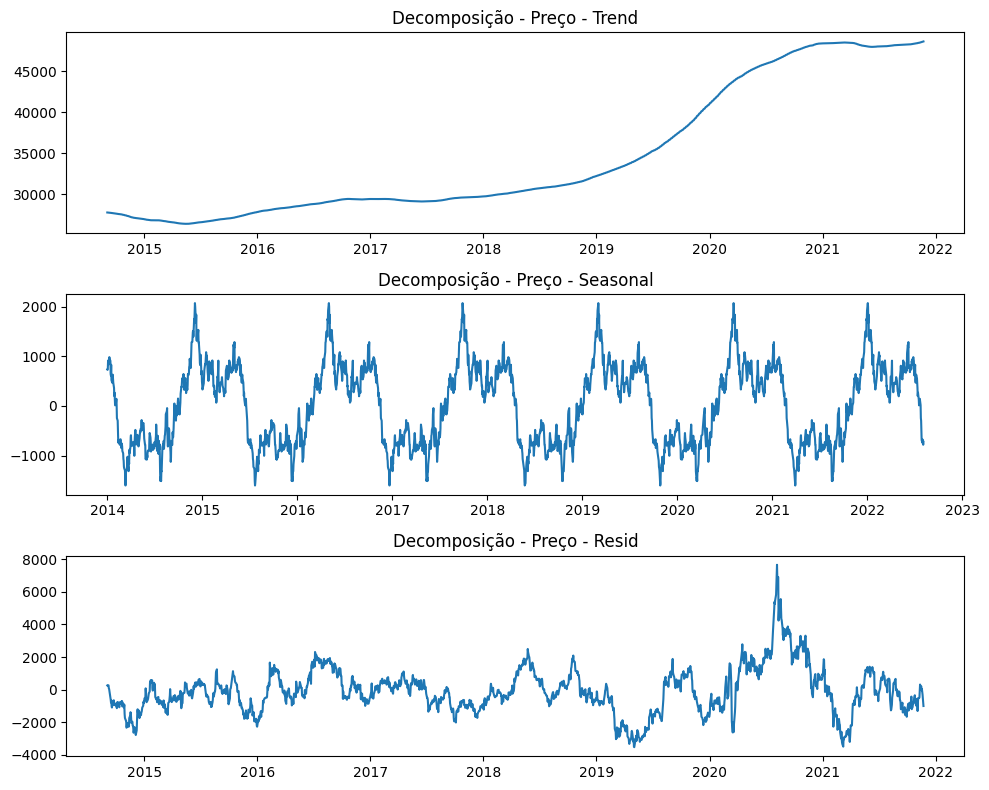

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

axes[0].plot(decomp_price.trend)
axes[0].set_title('Decomposição - Preço - Trend')

axes[1].plot(decomp_price.seasonal)
axes[1].set_title('Decomposição - Preço - Seasonal')

axes[2].plot(decomp_price.resid)
axes[2].set_title('Decomposição - Preço - Resid')


plt.tight_layout()

plt.show()

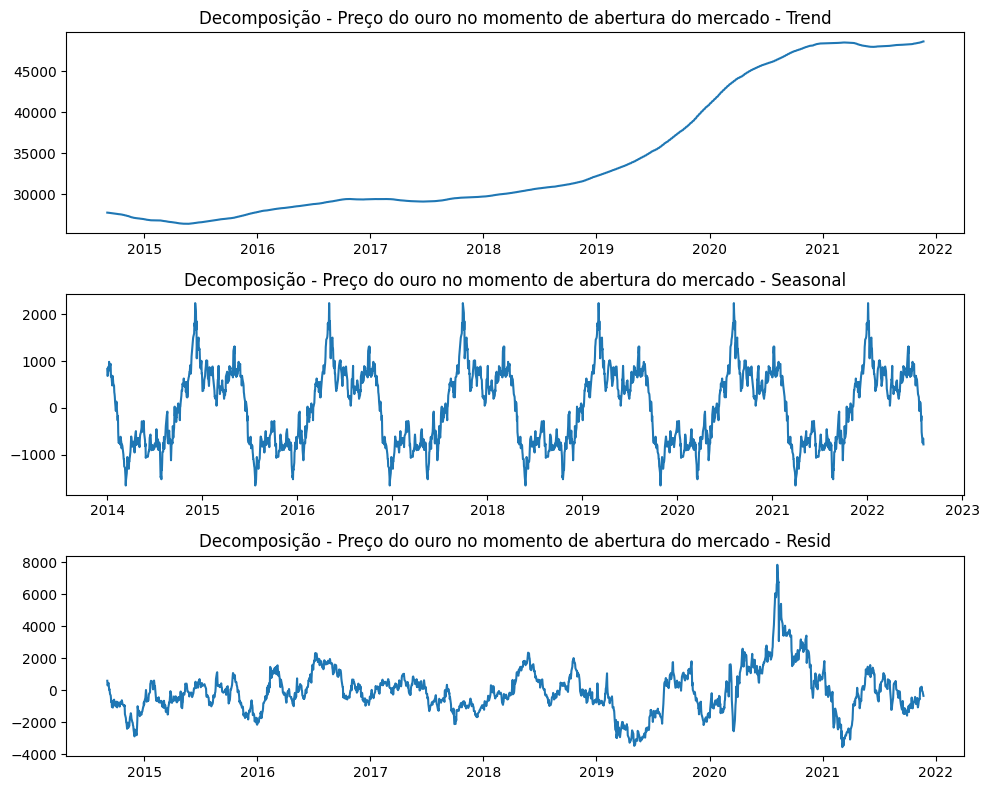

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

axes[0].plot(decomp_open.trend)
axes[0].set_title('Decomposição - Preço do ouro no momento de abertura do mercado - Trend')

axes[1].plot(decomp_open.seasonal)
axes[1].set_title('Decomposição - Preço do ouro no momento de abertura do mercado - Seasonal')

axes[2].plot(decomp_open.resid)
axes[2].set_title('Decomposição - Preço do ouro no momento de abertura do mercado - Resid')


plt.tight_layout()

plt.show()

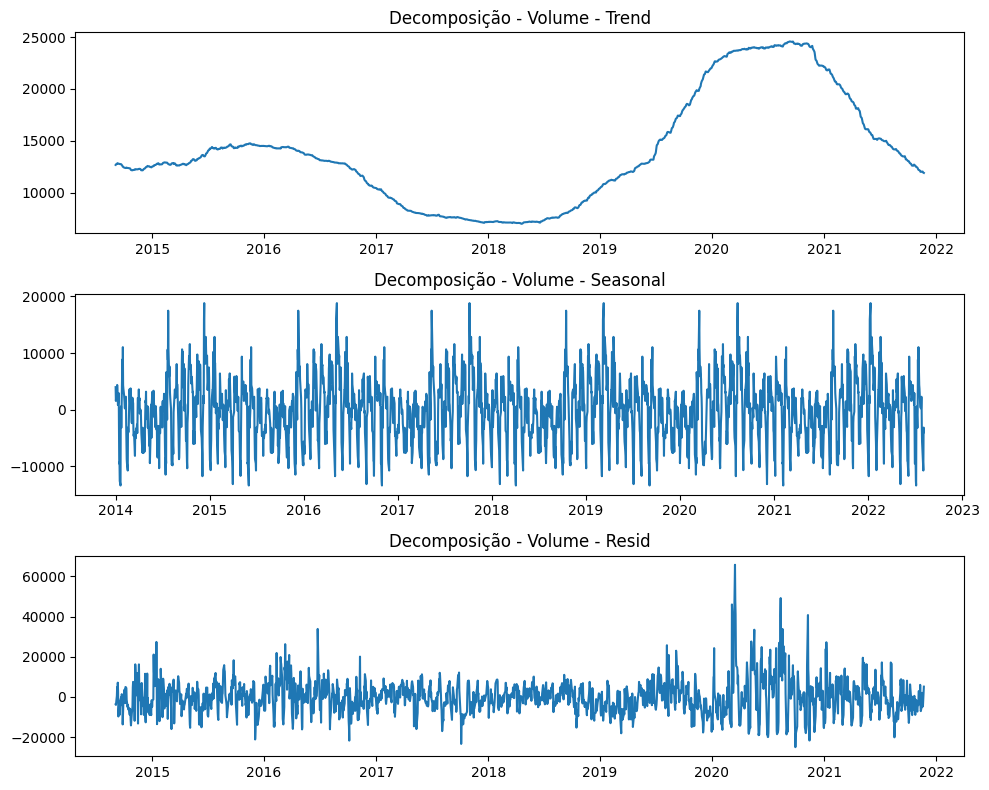

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

axes[0].plot(decomp_volume.trend)
axes[0].set_title('Decomposição - Volume - Trend')

axes[1].plot(decomp_volume.seasonal)
axes[1].set_title('Decomposição - Volume - Seasonal')

axes[2].plot(decomp_volume.resid)
axes[2].set_title('Decomposição - Volume - Resid')


plt.tight_layout()

plt.show()

### Verificando a possibilidade de usar o passado para prever o futuro

In [ ]:
plt.figure(figsize=(12, 4))
sm.graphics.tsa.plot_acf(dados['Price'], lags=30, ax=plt.gca())
plt.title('Autocorrelação - Preço')
plt.show()

plt.figure(figsize=(12, 4))
sm.graphics.tsa.plot_acf(dados['Open'], lags=30, ax=plt.gca())
plt.title('Autocorrelação - Preço do ouro no momento de abertura do mercado')
plt.show()

plt.figure(figsize=(12, 4))
sm.graphics.tsa.plot_acf(dados['Volume'], lags=30, ax=plt.gca())
plt.title('Autocorrelação - Volume')
plt.show()

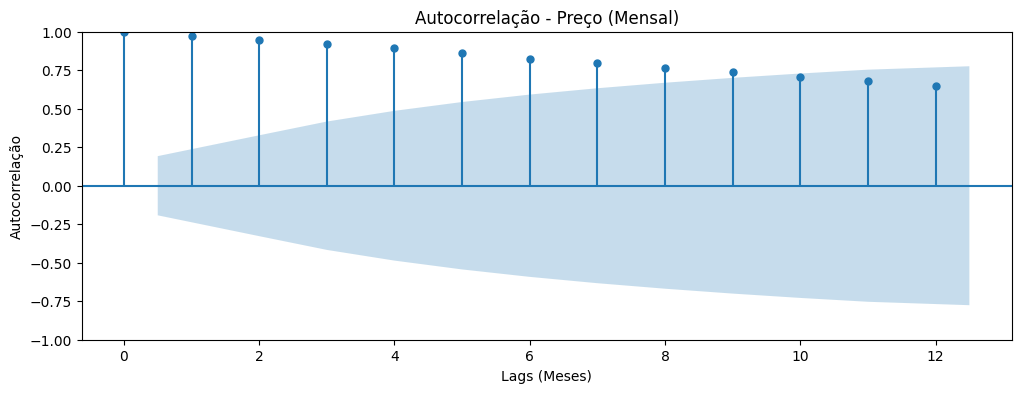

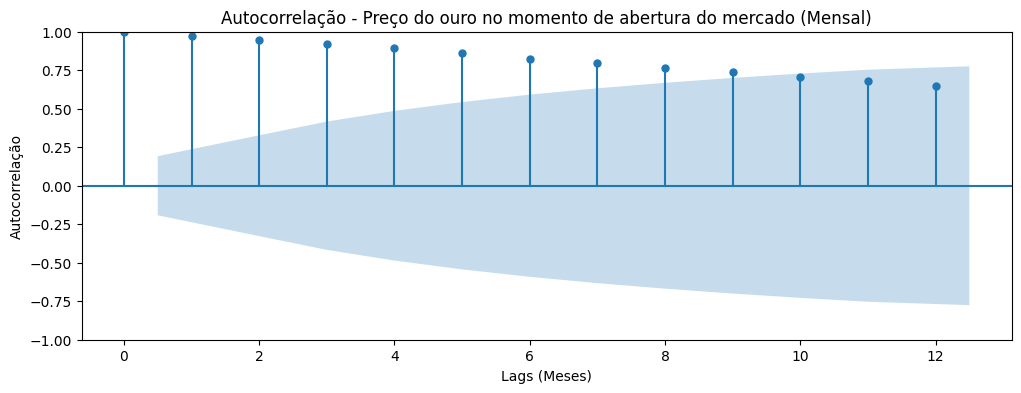

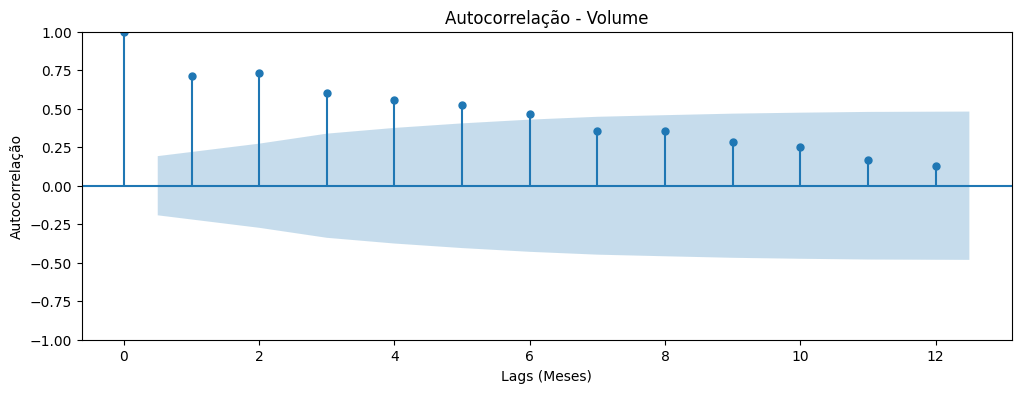

In [ ]:
dados_mensais = dados.resample('M').mean()


plt.figure(figsize=(12, 4))
sm.graphics.tsa.plot_acf(dados_mensais['Price'], lags=12, ax=plt.gca())
plt.title('Autocorrelação - Preço (Mensal)')
plt.xlabel('Lags (Meses)')
plt.ylabel('Autocorrelação')
plt.show()


plt.figure(figsize=(12, 4))
sm.graphics.tsa.plot_acf(dados_mensais['Open'], lags=12, ax=plt.gca())
plt.title('Autocorrelação - Preço do ouro no momento de abertura do mercado (Mensal)')
plt.xlabel('Lags (Meses)')
plt.ylabel('Autocorrelação')
plt.show()


plt.figure(figsize=(12, 4))
sm.graphics.tsa.plot_acf(dados_mensais['Volume'], lags=12, ax=plt.gca())
plt.title('Autocorrelação - Volume')
plt.xlabel('Lags (Meses)')
plt.ylabel('Autocorrelação')
plt.show()